#**Upload 2 datasets: df_post and df_post4**


> df_post: entire pre-processed dataset. Doesn't contain duration feature. All categorical features have been mapped accordingly



> df_post4: pre-processed  dataset with only 5 features that were present in the first 4 layers of the decision tree from previous section. The 5 features are: patience, age, job, contact, balance





In [4]:
from google.colab import files
uploaded = files.upload()

Saving df_post4.csv to df_post4.csv


In [0]:
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import ADASYN 
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import pickle
from google.colab import files
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from google.colab import drive
from sklearn.model_selection import cross_val_predict

In [0]:
df_post = pd.read_csv(io.StringIO(uploaded['df_post.csv'].decode('utf-8')))

In [0]:
df_post4 = pd.read_csv(io.StringIO(uploaded['df_post4.csv'].decode('utf-8')))

#**Training Logistic Regression Using df_post dataset**

In [0]:
feature_cols_0 = ['age', 'job', 'marital', 'education',  'default', 'balance', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'previous', 'poutcome']
X_0 = df_post[feature_cols_0]
y_0 = df_post.y

In [0]:
X_train_0, X_test_0, y_train_0, y_test_0= train_test_split(X_0, y_0, test_size = 0.3, random_state = 1)

In [0]:
logmodel_0 = LogisticRegression(max_iter=180)

In [0]:
logmodel_0 = logmodel_0.fit(X_train_0, y_train_0) 

In [0]:
y_pred_0 = logmodel.predict(X_test_0)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test_0, y_pred_0))

Accuracy: 0.8813333333333333


In [0]:
print(classification_report(y_test_0, y_pred_0))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1323
           1       0.00      0.00      0.00       177

    accuracy                           0.88      1500
   macro avg       0.44      0.50      0.47      1500
weighted avg       0.78      0.88      0.83      1500



In [0]:
print (confusion_matrix(y_test_0, y_pred_0))

[[1322    1]
 [ 177    0]]


#**Training Logistic Regression: Using df_post dataset and StratifiedShuffleSplit**

> StratifiedShuffleSplit: Scikit Learn function for stratified sampling - i.e. split traget class proportionally between training and test set.



In [0]:
feature_cols_1 = ['age', 'job', 'marital', 'education',  'default', 'balance', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'previous', 'poutcome']
X_1 = df_post[feature_cols_1]
y_1 = df_post.y

In [0]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 1, stratify = y_1)

In [0]:
logmodel_1 = LogisticRegression(max_iter=180)

In [0]:
logmodel_1 = logmodel_1.fit(X_train_1, y_train_1) 

In [0]:
y_pred_1 = logmodel_1.predict(X_test_1)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test_1, y_pred_1))

Accuracy: 0.8813333333333333


In [0]:
print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1324
           1       0.00      0.00      0.00       176

    accuracy                           0.88      1500
   macro avg       0.44      0.50      0.47      1500
weighted avg       0.78      0.88      0.83      1500



In [0]:
print (confusion_matrix(y_test_1, y_pred_1))

[[1322    2]
 [ 176    0]]


**ADASYN on df_post dataset**: this section is redundant and not used for final report of the model. Only used for exploratory data analysis.  


> Oversampling on training set for minority class. Attempt to decrease the dataset imbalance. After doing this section, it was realized that the data should be split into 60:20:20 = train:val:test sets



In [0]:
def makeOverSamplesADASYN(X,y):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 sm = ADASYN(sampling_strategy = 1.0, random_state = 42)
 X_res, y_res = sm.fit_resample(X, y)
 return(X_res,y_res)

In [0]:
feature_cols_2 = ['age', 'job', 'marital', 'education',  'default', 'balance', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'previous', 'poutcome']
X_2 = df_post[feature_cols_2]
y_2 = df_post.y

In [0]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.3, random_state = 42)

In [0]:
X_train_2_res, y_train_2_res = makeOverSamplesADASYN(X_train_2, y_train_2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
logmodel_2 = LogisticRegression(max_iter=300)

In [0]:
logmodel_2 = logmodel_2.fit(X_train_2_res, y_train_2_res) 

In [0]:
y_pred_2 = logmodel_2.predict(X_test_2)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test_2, y_pred_2))

Accuracy: 0.7166666666666667


In [0]:
print(classification_report(y_test_2, y_pred_2))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1333
           1       0.22      0.60      0.32       167

    accuracy                           0.72      1500
   macro avg       0.58      0.67      0.57      1500
weighted avg       0.86      0.72      0.77      1500



In [0]:
print (confusion_matrix(y_test_2, y_pred_2))

[[974 359]
 [ 66 101]]


#**Splitting *df_post* dataset into : 60:20:20 (train:validate:test)**



> All models trained and validated on df_post dataset will make use of data produced from this step




In [0]:
feature_cols_3 = ['age', 'job', 'marital', 'education',  'default', 'balance', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'previous', 'poutcome']
X_3 = df_post[feature_cols_3]
y_3 = df_post.y

In [0]:
X_train_t, X_test, y_train_t, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_t, y_train_t, test_size=0.25, random_state=42)

#**Applying ADASYN on *df_post* dataset AFTER split**


> All models trained and validated on df_post dataset will make use of data produced from this step




In [0]:
def makeOverSamplesADASYN_auto(X,y):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 sm = ADASYN(random_state = 42)
 X_res, y_res = sm.fit_resample(X, y)
 return(X_res,y_res)

In [9]:
X_train_res, y_train_res = makeOverSamplesADASYN_auto(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#**Applying Logistic Regression on *df_post* dataset**



In [0]:
logmodel_3 = LogisticRegression(max_iter=300)

In [0]:
logmodel_3 = logmodel_3.fit(X_train_res, y_train_res) 

In [0]:
y_pred_3 = logmodel_3.predict(X_val)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_val, y_pred_3))

Accuracy: 0.665


In [14]:
print(classification_report(y_val, y_pred_3))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       886
           1       0.16      0.46      0.24       114

    accuracy                           0.67      1000
   macro avg       0.54      0.58      0.51      1000
weighted avg       0.82      0.67      0.72      1000



In [15]:
print (confusion_matrix(y_val, y_pred_3))

[[612 274]
 [ 61  53]]


In [49]:
print ('Validation Results for Logistic Regression on df_post')
print (logmodel_3.score(X_val, y_val))
print (recall_score(y_val, logmodel_3.predict(X_val)))
print ('\nTest Results')
print (logmodel_3.score(X_test, y_test))
print (recall_score(y_test, logmodel_3.predict(X_test)))

Validation Results for Logistic Regression on df_post
0.665
0.4649122807017544

Test Results
0.668
0.5045871559633027


In [0]:
y_pred_3_test = logmodel_3.predict(X_test)

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_3_test))

Accuracy: 0.668


In [19]:
print(classification_report(y_test, y_pred_3_test))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       891
           1       0.17      0.50      0.25       109

    accuracy                           0.67      1000
   macro avg       0.54      0.60      0.52      1000
weighted avg       0.84      0.67      0.73      1000



In [50]:
print (confusion_matrix(y_test, y_pred_3_test))

[[613 278]
 [ 54  55]]


#**Splitting *df_post4* dataset into : 60:20:20 (train:validate:test)**


> All models trained and validate on df_post4 dataset will make use of data produced from this step







In [0]:
feature_cols_4 = ['age', 'job', 'balance', 'contact', 'poutcome']
X_4 = df_post4[feature_cols_4]
y_4 = df_post4.y

In [0]:
X_train_t_dfp4, X_test_dfp4, y_train_t_dfp4, y_test_dfp4 = train_test_split(X_4, y_4, test_size=0.2, random_state=42)
X_train_dfp4, X_val_dfp4, y_train_dfp4, y_val_dfp4 = train_test_split(X_train_t_dfp4, y_train_t_dfp4, test_size=0.25, random_state=42)

#**Applying ADASYN on *df_post4* dataset AFTER split**


> All models trained and validate on df_post4 dataset will make use of data produced from this step



In [31]:
X_train_res_dfp4, y_train_res_dfp4 = makeOverSamplesADASYN_auto(X_train_dfp4, y_train_dfp4)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#**Applying Logistic Regression on *df_post4* dataset**

In [0]:
logmodel_4 = LogisticRegression(max_iter=300)

In [0]:
logmodel_4 = logmodel_4.fit(X_train_res_dfp4, y_train_res_dfp4) 

In [48]:
print ('Validation Results for Logistic Regression on df_post4')
print (logmodel_4.score(X_val_dfp4, y_val_dfp4))
print (recall_score(y_val_dfp4, logmodel_4.predict(X_val_dfp4)))
print ('\nTest Results')
print (logmodel_4.score(X_test_dfp4, y_test_dfp4))
print (recall_score(y_test_dfp4, logmodel_4.predict(X_test_dfp4)))

Validation Results for Logistic Regression on df_post4
0.784
0.41228070175438597

Test Results
0.785
0.3669724770642202


In [0]:
y_pred_4_test = logmodel_4.predict(X_test_dfp4)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test_dfp4, y_pred_4_test))

Accuracy: 0.785


In [37]:
print(classification_report(y_test_dfp4, y_pred_4_test))

              precision    recall  f1-score   support

           0       0.92      0.84      0.87       891
           1       0.22      0.37      0.27       109

    accuracy                           0.79      1000
   macro avg       0.57      0.60      0.57      1000
weighted avg       0.84      0.79      0.81      1000



In [51]:
print (confusion_matrix(y_test_dfp4, y_pred_4_test))

[[745 146]
 [ 69  40]]


#**Applying Naive Bayes Classifier on df_post dataset**

In [0]:
gnb_1 = GaussianNB()

In [0]:
gnb_1 = gnb_1.fit(X_train_res, y_train_res)

In [42]:
print ('Validation Results for Naive Bayes Classifier on df_post')
print (gnb_1.score(X_val, y_val))
print (recall_score(y_val, gnb_1.predict(X_val)))
print ('\nTest Results')
print (gnb_1.score(X_test, y_test))
print (recall_score(y_test, gnb_1.predict(X_test)))

Validation Results for Naive Bayes Classifier on df_post
0.354
0.8421052631578947

Test Results
0.325
0.7706422018348624


In [43]:
print(classification_report(y_test, gnb_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.27      0.42       891
           1       0.11      0.77      0.20       109

    accuracy                           0.33      1000
   macro avg       0.51      0.52      0.31      1000
weighted avg       0.82      0.33      0.39      1000



In [52]:
print (confusion_matrix(y_test, gnb_1.predict(X_test)))

[[241 650]
 [ 25  84]]


#**Applying Naive Bayes Classifier on df_post4 dataset**

In [0]:
gnb_2 = GaussianNB()

In [0]:
gnb_2 = gnb_2.fit(X_train_res_dfp4, y_train_res_dfp4)

In [47]:
print ('Validation Results for Naive Bayes Classifier on df_post4')
print (gnb_2.score(X_val_dfp4, y_val_dfp4))
print (recall_score(y_val_dfp4, gnb_2.predict(X_val_dfp4)))
print ('\nTest Results')
print (gnb_2.score(X_test_dfp4, y_test_dfp4))
print (recall_score(y_test_dfp4, gnb_2.predict(X_test_dfp4)))

Validation Results for Naive Bayes Classifier on df_post4
0.287
0.9210526315789473

Test Results
0.298
0.8256880733944955


In [53]:
print(classification_report(y_test_dfp4, gnb_2.predict(X_test_dfp4)))

              precision    recall  f1-score   support

           0       0.92      0.23      0.37       891
           1       0.12      0.83      0.20       109

    accuracy                           0.30      1000
   macro avg       0.52      0.53      0.29      1000
weighted avg       0.83      0.30      0.35      1000



In [54]:
print (confusion_matrix(y_test_dfp4, gnb_2.predict(X_test_dfp4)))

[[208 683]
 [ 19  90]]


#**Applying kNN on df_post dataset**



> First choosing the optimal number for K (i.e. the number of neighbours to sample from for each instance of the training set)



In [0]:
error_rate = []

for i in range(1,500):
    
    knn_1 = KNeighborsClassifier(n_neighbors=i)
    knn_1 = knn_1.fit(X_train_res,y_train_res)
    pred_i = knn_1.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Error Rate')

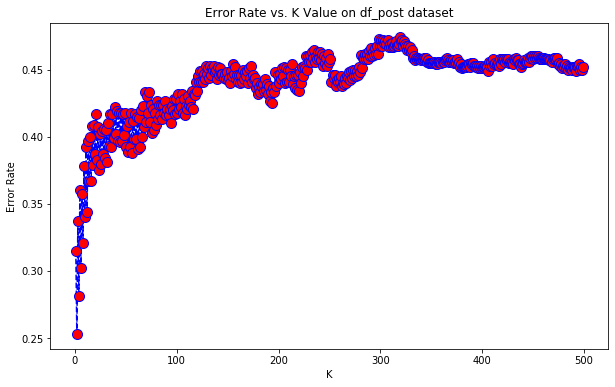

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,500),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value on df_post dataset')
plt.xlabel('K')
plt.ylabel('Error Rate')

The error rate hover between 0.40 to 0.5 in the validation set for k > 150. Therefore let's use k = 151. In practice it's a good practice to choose an odd value for k if the total number of classes are even. 

**Classification using K = 151**

In [0]:
knn_2 = KNeighborsClassifier(n_neighbors=151)

In [0]:
knn_2 = knn_2.fit(X_train_res, y_train_res)

In [73]:
print ('Validation Results for kNN Classifier on df_post')
print (knn_2.score(X_val, y_val))
print (recall_score(y_val, knn_2.predict(X_val)))
print ('\nTest Results')
print (knn_2.score(X_test, y_test))
print (recall_score(y_test, knn_2.predict(X_test)))

Validation Results for kNN Classifier on df_post
0.556
0.6403508771929824

Test Results
0.544
0.5596330275229358


In [74]:
print(classification_report(y_test, knn_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.54      0.68       891
           1       0.13      0.56      0.21       109

    accuracy                           0.54      1000
   macro avg       0.52      0.55      0.45      1000
weighted avg       0.82      0.54      0.63      1000



In [75]:
print (confusion_matrix(y_test, knn_2.predict(X_test)))

[[483 408]
 [ 48  61]]


#**Applying kNN on df_post4 dataset**



> First choosing the optimal number for K (i.e. the number of neighbours to sample from for each instance of the training set)



In [0]:
error_rate_dfp4 = []

for i in range(1,500):
    
    knn_3 = KNeighborsClassifier(n_neighbors=i)
    knn_3 = knn_3.fit(X_train_res_dfp4,y_train_res_dfp4)
    pred_i_dfp4 = knn_3.predict(X_val_dfp4)
    error_rate_dfp4.append(np.mean(pred_i_dfp4 != y_val_dfp4))

Text(0, 0.5, 'Error Rate')

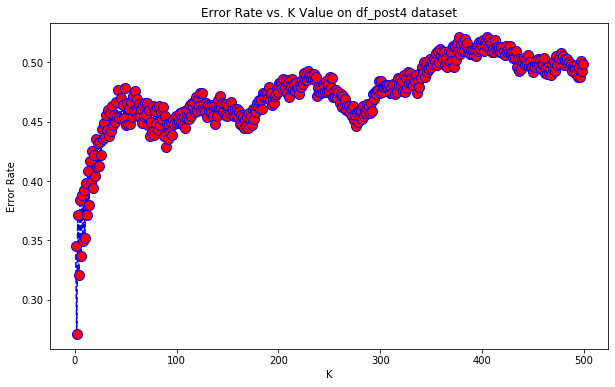

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,500),error_rate_dfp4,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value on df_post4 dataset')
plt.xlabel('K')
plt.ylabel('Error Rate')

The error rate hover between 0.45 to 0.55 in the validation set for k > 300. Therefore let's use k = 301. In practice it's a good practice to choose an odd value for k if the total number of classes are even.

**Classification using K = 301**

In [0]:
knn_4 = KNeighborsClassifier(n_neighbors=301)

In [0]:
knn_4 = knn_4.fit(X_train_res_dfp4, y_train_res_dfp4)

In [82]:
print ('Validation Results for kNN Classifier on df_post4')
print (knn_4.score(X_val_dfp4, y_val_dfp4))
print (recall_score(y_val_dfp4, knn_4.predict(X_val_dfp4)))
print ('\nTest Results')
print (knn_4.score(X_test_dfp4, y_test_dfp4))
print (recall_score(y_test_dfp4, knn_4.predict(X_test_dfp4)))

Validation Results for kNN Classifier on df_post4
0.516
0.5701754385964912

Test Results
0.517
0.6330275229357798


In [83]:
print(classification_report(y_test_dfp4, knn_4.predict(X_test_dfp4)))

              precision    recall  f1-score   support

           0       0.92      0.50      0.65       891
           1       0.13      0.63      0.22       109

    accuracy                           0.52      1000
   macro avg       0.53      0.57      0.44      1000
weighted avg       0.83      0.52      0.60      1000



In [84]:
print (confusion_matrix(y_test_dfp4, knn_4.predict(X_test_dfp4)))

[[448 443]
 [ 40  69]]


**From the error analysis using precision, recall, accuracy and f1 scores it seems logistic regression on df_post would be the best predictor**

#**Performing Grid Search on Logistic Regression Classifier using df_post Dataset**



> **Normalizing and running ADASYN (oversampling on minority class) on the df_post dataset before modelling** 


> Performing Normalization only on Numeric features





In [0]:
feature_cols_5 = ['age', 'job', 'marital', 'education',  'default', 'balance', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'previous', 'poutcome']
X_5 = df_post[feature_cols_5]
y_5 = df_post.y

In [0]:
df_post_numeric = X_5[['age', 'balance','day', 'campaign', 'pdays', 'previous']]
min_max_scaler = preprocessing.MinMaxScaler()
numeric_normed_df_post = min_max_scaler.fit_transform(df_post_numeric)
df_post_numeric_normed = pd.DataFrame(numeric_normed_df_post)


In [0]:
df_post_numeric_normed.columns = ['age', 'balance','day', 'campaign', 'pdays', 'previous']

In [0]:
feature_cols_6 = ['job', 'marital', 'education',  'default','housing', 'loan', 'contact','poutcome']
df_post_all_n = df_post[feature_cols_6]

In [0]:
df_post_all_n = df_post_all_n.join(df_post_numeric_normed)

In [114]:
#type(y_5)

pandas.core.series.Series

In [0]:
#df_post_all_n
feature_cols_7 = ['age', 'job', 'marital', 'education',  'default', 'balance', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'previous', 'poutcome']
X_6 = df_post_all_n[feature_cols_7]
y_6 = df_post.y

In [0]:
X_train_ft, X_test_f, y_train_ft, y_test_f = train_test_split(X_6, y_6, test_size=0.2, random_state=42)
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_train_ft, y_train_ft, test_size=0.25, random_state=42)

In [118]:
X_train_f_res, y_train_f_res = makeOverSamplesADASYN_auto(X_train_f, y_train_f)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
#classifier_pen = ['l1', 'l2']
#classifier_regularization_hyper_parameter_space = np.logspace(0, 4, 20)
#classifier_solver = ['liblinear']
#hyper_parameter_grid = dict(regularizer = classifier_pen, solver = classifier_solver)

In [0]:
param_grid = {"C":np.logspace(0,4,20), "penalty":["l1","l2"]}

In [0]:
logmodel_5 = LogisticRegression(max_iter=500)

In [0]:
GS_logreg = GridSearchCV(logmodel_5, param_grid, cv = 5, verbose=1, n_jobs=-1)

In [160]:
GS_best_model_logreg = GS_logreg.fit(X_train_f_res, y_train_f_res)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.6s finished


In [161]:
print("Tuned hpyerparameters :(best parameters) ",GS_best_model_logreg.best_params_)
print("accuracy :",GS_best_model_logreg.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 127.42749857031335, 'penalty': 'l2'}
accuracy : 0.6738622956123586


In [162]:
print ('Validation Results for Best Performing Logistic Regression on df_post')
print (GS_best_model_logreg.score(X_val_f, y_val_f))
print (recall_score(y_val_f, GS_best_model_logreg.predict(X_val_f)))
print ('\nTest Results')
print (GS_best_model_logreg.score(X_test_f, y_test_f))
print (recall_score(y_test_f, GS_best_model_logreg.predict(X_test_f)))

Validation Results for Best Performing Logistic Regression on df_post
0.632
0.6052631578947368

Test Results
0.641
0.6972477064220184


In [163]:
print(classification_report(y_test_f, GS_best_model_logreg.predict(X_test_f)))

              precision    recall  f1-score   support

           0       0.94      0.63      0.76       891
           1       0.19      0.70      0.30       109

    accuracy                           0.64      1000
   macro avg       0.57      0.67      0.53      1000
weighted avg       0.86      0.64      0.71      1000



In [164]:
print (confusion_matrix(y_test_f, GS_best_model_logreg.predict(X_test_f)))

[[565 326]
 [ 33  76]]


#Saving the Final Logistic Regression Model Using "pickle" Module

In [0]:
filename = 'final_logis_reg.sav'

In [0]:
pickle.dump(GS_best_model_logreg, open(filename, 'wb'))

In [0]:
files.download('final_logis_reg.sav')

#ROC and AUC for Final Logistic Regression Model:

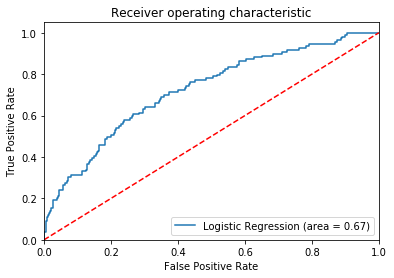

In [178]:
logit_roc_auc = roc_auc_score(y_test_f, GS_best_model_logreg.predict(X_test_f))
fpr, tpr, thresholds = roc_curve(y_test_f, GS_best_model_logreg.predict_proba(X_test_f)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#Checking the .sav file Loading

In [180]:
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
loaded_final_model = pickle.load(open('final_logis_reg.sav', 'rb'))

In [0]:
check_result = loaded_final_model.score(X_test_f, y_test_f)

In [183]:
print(check_result)

0.641


#**Training the Final Model on the Whole Dataset**

In [0]:
feature_cols_8 = ['age', 'job', 'marital', 'education',  'default', 'balance', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'previous', 'poutcome']
X_8 = df_post[feature_cols_8]
y_8 = df_post.y

In [0]:
#X_train_whole, X_val_whole, y_train_whole, y_val_whole = train_test_split(X_8, y_8, test_size=0.01, random_state=42)

In [235]:
type(X_train_whole)

pandas.core.frame.DataFrame

In [236]:
X_train_whole_res, y_train_whole_res = makeOverSamplesADASYN_auto(X_8, y_8)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
logmodel_6 = LogisticRegression(C = 127.42749857031335, penalty = 'l2', max_iter = 500)

In [0]:
predicted = cross_val_predict(logmodel_6, X_train_whole_res, y_train_whole_res, cv=10)

In [240]:
print (metrics.accuracy_score(y_train_whole_res, predicted))

0.6208520179372198


In [241]:
print (metrics.classification_report(y_train_whole_res, predicted))

              precision    recall  f1-score   support

           0       0.61      0.64      0.62      4414
           1       0.63      0.61      0.62      4506

    accuracy                           0.62      8920
   macro avg       0.62      0.62      0.62      8920
weighted avg       0.62      0.62      0.62      8920



#Saving final model trained on **WHOLE DATASET***

In [0]:
filename = 'final_logis_reg.sav'

In [0]:
pickle.dump(logmodel_6, open(filename, 'wb'))

In [0]:
files.download('final_logis_reg.sav')